<a href="https://colab.research.google.com/github/PhamDucThinh1995/Test-Time-Augmentation/blob/main/Test_Time_Augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import cifar10, mnist, fashion_mnist
from keras.preprocessing import image
from keras.layers import Conv2D, Dense, Input, Flatten, Dropout
from keras.models import Model, Sequential, load_model
from tensorflow.keras.utils import to_categorical
from keras.utils.vis_utils import plot_model
from keras import optimizers
import keras
from keras.preprocessing.image import ImageDataGenerator
from tqdm import tqdm
import numpy as np
from keras import backend as K
import matplotlib.pyplot as plt

In [ ]:
# (x_train, y_train), (x_val, y_val) = cifar10.load_data()
(x_train, y_train), (x_val, y_val) = cifar10.load_data()

In [ ]:
y_train.sum()

225000

In [ ]:
x_train

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [ ]:
x_train, x_val = x_train.astype('float32')/255.,  x_val.astype('float32')/255. #Normalize step
y_train, y_val = to_categorical(y_train), to_categorical(y_val)

In [ ]:
x_train

array([[[[0.23137255, 0.24313726, 0.24705882],
         [0.16862746, 0.18039216, 0.1764706 ],
         [0.19607843, 0.1882353 , 0.16862746],
         ...,
         [0.61960787, 0.5176471 , 0.42352942],
         [0.59607846, 0.49019608, 0.4       ],
         [0.5803922 , 0.4862745 , 0.40392157]],

        [[0.0627451 , 0.07843138, 0.07843138],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509805, 0.21568628],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117648, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215687, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941177, 0.19607843],
         [0.47058824, 0.32941177, 0.19607843],
         [0.42745098, 0.28627452, 0.16470589]],

        ...,

        [[0.8156863 , 0.6666667 , 0.3764706 ],
         [0.7882353 , 0.6       , 0.13333334]

In [ ]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
train_datagen = ImageDataGenerator(
        shear_range=0.1,
        zoom_range=0.1,
        horizontal_flip=True,
        rotation_range=10.,
        fill_mode='reflect',
        width_shift_range = 0.1, 
        height_shift_range = 0.1)

In [ ]:
train_datagen.fit(x_train)

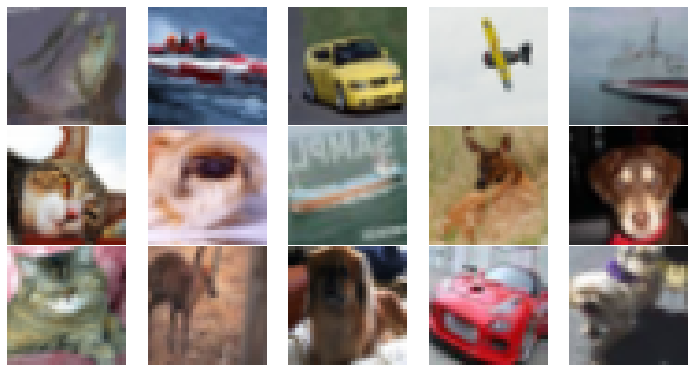

In [ ]:
plt.figure(figsize=(10,5))

for X_batch, y_batch in train_datagen.flow(x_train, y_train, batch_size=15):
  for i in range(0,15):
    plt.subplot(3,5,i+1)
    plt.imshow(X_batch[i].reshape(32,32,3),cmap=plt.get_cmap('gray'))
    plt.axis('off')
  plt.tight_layout(pad=0.1)
  plt.show()
  break


In [ ]:
model = Sequential()
model.add(Conv2D(64,(3,3),activation='relu',input_shape=(32,32,3)))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='relu'))

model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [ ]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 64)        1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 conv2d_2 (Conv2D)           (None, 26, 26, 128)       147584    
                                                                 
 flatten (Flatten)           (None, 86528)             0         
                                                                 
 dense (Dense)               (None, 256)               22151424  
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               3

In [ ]:
bs = 64
epochs = 15

In [ ]:
history = model.fit_generator(train_datagen.flow(x_train, y_train,
                              batch_size=bs),
                              epochs=epochs,
                              steps_per_epoch=len(x_train)/bs,
                              validation_data=(x_val, y_val))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


Epoch 1/15
781/781 [==============================] - 1277s 2s/step - loss: 2.3194 - accuracy: 0.1664 - val_loss: 2.1226 - val_accuracy: 0.2093
Epoch 2/15
781/781 [==============================] - 1247s 2s/step - loss: 2.1363 - accuracy: 0.2088 - val_loss: 2.0338 - val_accuracy: 0.2649
Epoch 3/15
715/781 [==========================>...] - ETA: 1:39 - loss: 2.0708 - accuracy: 0.2495

In [ ]:
print(f'Baseline accuracy: {model.evaluate(x_val, y_val)[1]}')

313/313 [==============================] - 2s 5ms/step - loss: 1.7182 - accuracy: 0.3771
Baseline accuracy: 0.37709999084472656


Test Image Generator

In [ ]:
tta_steps = 10

In [ ]:
test_datagen = ImageDataGenerator(
        shear_range=0.1,
        zoom_range=0.1,
        horizontal_flip=True,
        rotation_range=10.,
        fill_mode='reflect', 
        width_shift_range = 0.1, 
        height_shift_range = 0.1)

In [ ]:
predictions = []

for i in tqdm(range(tta_steps)):
    preds = model.predict_generator(test_datagen.flow(x_val, batch_size=bs,
                                                      shuffle=False), steps = len(x_val)/bs)
    predictions.append(preds)

  0%|          | 0/10 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  """
100%|██████████| 10/10 [00:47<00:00,  4.72s/it]


In [ ]:
final_pred = np.mean(predictions, axis=0)

In [ ]:
predictions[9]

array([[ 339469.28 ,  387912.47 ,  403709.34 , ...,  153201.69 ,
         413484.7  ,  215765.55 ],
       [ 841540.   , 2148173.8  ,   73241.336, ...,       0.   ,
        1535047.9  , 2059073.2  ],
       [ 597980.94 , 1342822.   ,   68623.555, ...,       0.   ,
        1171691.4  ,  992246.6  ],
       ...,
       [  80239.305,  128358.07 ,  553092.94 , ...,  294549.75 ,
          72066.945,   49240.258],
       [ 111592.9  ,  160254.66 ,  607190.06 , ...,  215451.22 ,
         146052.84 ,   50221.273],
       [ 129690.78 ,  115598.586,  478844.75 , ...,  942479.1  ,
          61459.043,   86471.1  ]], dtype=float32)

In [ ]:
final_pred.shape

(10000, 10)

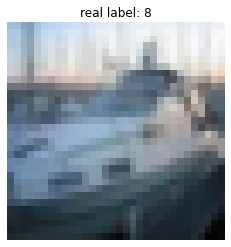

In [ ]:
image_ix = 2
test_image = x_val[image_ix]
plt.imshow(test_image)
plt.title(f'real label: {np.argmax(y_val[image_ix])}')
plt.axis('off');